In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import missingno
import os
import glob

from __future__ import print_function

#import psycopg2
import datetime
import sys
from operator import itemgetter, attrgetter, methodcaller
import numpy as np
import itertools
import os.path
import matplotlib.pyplot as plt
import math
from multiprocessing import Pool, cpu_count

#from utils import getConnection
import polars as pl
%matplotlib inline

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

from sklearn.impute import KNNImputer

import warnings
# ignore warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline
plotsize = (13, 5)

import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

# You can use any Python source file as a module by executing an import statement in some other Python source file.
# The import statement combines two operations; it searches for the named module, then it binds the results of that search
# to a name in the local scope.
import os 
import pandas as pd
import numpy as np
# Import matplotlib to visualize the model
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns
%matplotlib inline   

# Analyse age (search for patterns), search imputation methods

In [2]:
df = pl.read_parquet("df_filtered.parquet")

In [3]:
df.shape

(19993, 117)

In [4]:
df.columns

['ROW_ID',
 'SUBJECT_ID',
 'HADM_ID',
 'ADMITTIME',
 'DISCHTIME',
 'DEATHTIME',
 'ADMISSION_TYPE',
 'ADMISSION_LOCATION',
 'DISCHARGE_LOCATION',
 'INSURANCE',
 'LANGUAGE',
 'RELIGION',
 'MARITAL_STATUS',
 'ETHNICITY',
 'EDREGTIME',
 'EDOUTTIME',
 'DIAGNOSIS',
 'HOSPITAL_EXPIRE_FLAG',
 'HAS_CHARTEVENTS_DATA',
 'COSTCENTER',
 'CHARTDATE',
 'CPT_CD',
 'CPT_NUMBER',
 'CPT_SUFFIX',
 'TICKET_ID_SEQ',
 'SECTIONHEADER',
 'SUBSECTIONHEADER',
 'DESCRIPTION',
 'GENDER',
 'DOB',
 'DOD',
 'DOD_HOSP',
 'DOD_SSN',
 'EXPIRE_FLAG',
 'SEQ_NUM',
 'ICD9_CODE',
 'ICUSTAY_ID',
 'STARTDATE',
 'ENDDATE',
 'DRUG_TYPE',
 'DRUG',
 'DRUG_NAME_POE',
 'DRUG_NAME_GENERIC',
 'FORMULARY_DRUG_CD',
 'GSN',
 'NDC',
 'PROD_STRENGTH',
 'DOSE_VAL_RX',
 'DOSE_UNIT_RX',
 'FORM_VAL_DISP',
 'FORM_UNIT_DISP',
 'ROUTE',
 'DRG_TYPE',
 'DRG_CODE',
 'DESCRIPTION_right',
 'DRG_SEVERITY',
 'DRG_MORTALITY',
 'ICUSTAY_ID_right',
 'DBSOURCE',
 'EVENTTYPE',
 'PREV_CAREUNIT',
 'CURR_CAREUNIT',
 'PREV_WARDID',
 'CURR_WARDID',
 'INTIME',
 'O

In [19]:
aux = df[['ROW_ID',
 'SUBJECT_ID',
 'HADM_ID',
 'ADMITTIME',
 'DISCHTIME',
 'DEATHTIME',
 'ADMISSION_TYPE',
 'ADMISSION_LOCATION',
 'DISCHARGE_LOCATION',
 'INSURANCE',
 'LANGUAGE',
 'RELIGION',
 'MARITAL_STATUS',
 'ETHNICITY',
 'EDREGTIME',
 'EDOUTTIME',
 'DIAGNOSIS',
 'HOSPITAL_EXPIRE_FLAG',
 'HAS_CHARTEVENTS_DATA',
 'COSTCENTER',
 'CHARTDATE',
 'CPT_CD',
 'CPT_NUMBER',
 'CPT_SUFFIX',
 'TICKET_ID_SEQ',
 'SECTIONHEADER',
 'SUBSECTIONHEADER',
 'DESCRIPTION',
 'GENDER',
 'DOB',
 'DOD',
 'DOD_HOSP',
 'DOD_SSN',
 'EXPIRE_FLAG',
 'SEQ_NUM',
 'ICD9_CODE','LOS']].to_pandas()

#### calculo de edad

In [20]:
type(aux['DOB'][0])
aux['DOB']
aux['DOB'] = pd.to_datetime(aux['DOB'], format='%Y-%m-%d %H:%M:%S')

In [21]:
aux['DOB'] = pd.to_datetime(aux['DOB'])
aux['ADMITTIME'] = pd.to_datetime(aux['ADMITTIME'])
aux['ADMITTIME'] = [timestamp.to_pydatetime() for timestamp in aux['ADMITTIME']]
aux['DOB'] = [timestamp.to_pydatetime() for timestamp in aux['DOB']]
aux['ADMITTIME'] = [timestamp.date() for timestamp in aux['ADMITTIME']]
aux['DOB'] = [timestamp.date() for timestamp in aux['DOB']]
aux["age"] = (aux['ADMITTIME'].to_numpy() - aux['DOB'].to_numpy())
aux["year_age"] = [i.days/365 for i in aux["age"]]

In [22]:
aux.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,SEQ_NUM,ICD9_CODE,LOS,age,year_age
0,22,23,152223,2153-09-03,2153-09-08 19:10:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,2082-07-17,None,None,None,0,"[1, 2, 3, 4, 5, 6, 7, 8]","[41401, 4111, 4241, V4582, 2724, 4019, 60000, ...","[9.29, 30.34, 99.15, None]","25980 days, 0:00:00",71.2
1,23,23,124321,2157-10-18,2157-10-25 14:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,...,2082-07-17,None,None,None,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[2252, 3485, 78039, 4241, 4019, 2720, 2724, V4...","[64.09, 28.47, 5.95, 63.97, None]","27486 days, 0:00:00",75.3
2,33,34,115799,2186-07-18,2186-07-20 16:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,...,1886-07-18,2192-01-30 00:00:00,None,2192-01-30 00:00:00,1,"[1, 2, 3, 4, 5, 6, 7, 8]","[41071, 4280, 4254, 42731, 9971, 4260, 41401, ...","[1.4, 17.28, 28.67, None]","109573 days, 0:00:00",300.2
3,34,34,144319,2191-02-23,2191-02-25 20:20:00,None,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,1886-07-18,2192-01-30 00:00:00,None,2192-01-30 00:00:00,1,"[1, 2, 3, 4, 5, 6, 7, 8]","[42789, 42822, 4263, 41401, V5861, 4280, 2449,...","[.13, .59, 37.25, 24.95, None]","111254 days, 0:00:00",304.8
4,36,36,182104,2131-04-30,2131-05-08 14:00:00,None,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,2061-08-17,None,None,None,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9]","[41401, 4111, 496, 4019, 3051, 53081, 60000, V...","[86.74, 2.82, 26.63, 72.96, None]","25457 days, 0:00:00",69.7


[Text(0.5, 0, 'Variable Type'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Variables Count Across Datatype')]

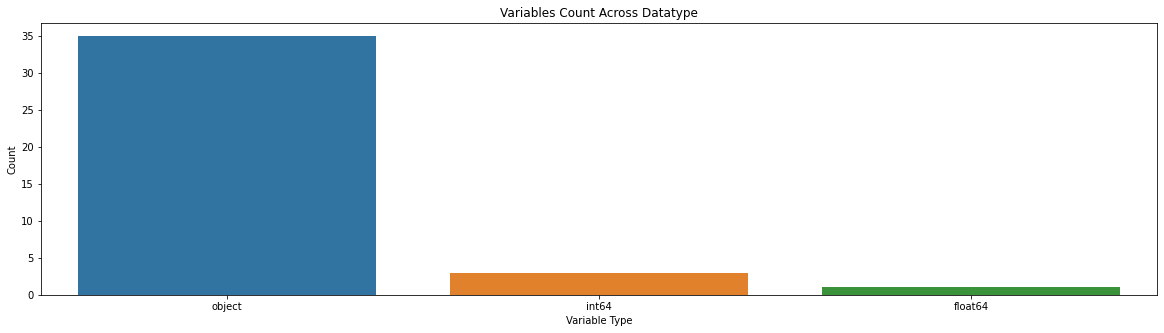

In [24]:
dataTypeDf = pd.DataFrame(aux.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax)
ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")


<Axes: >

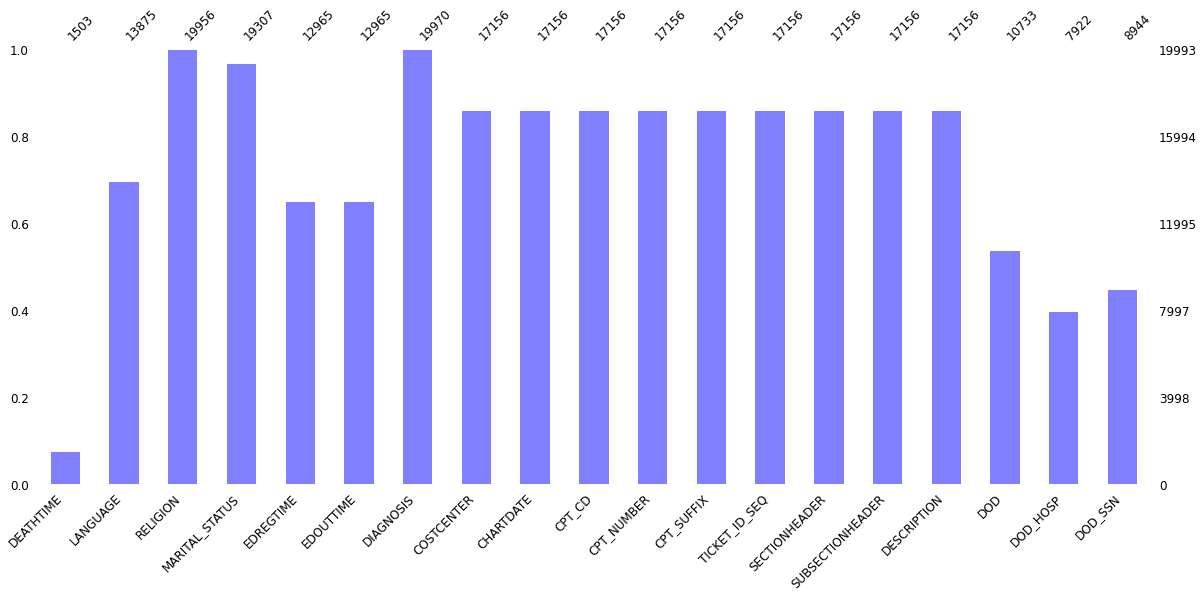

In [25]:
missingValueColumns = aux.columns[aux.isnull().any()].tolist()
msno.bar(aux[missingValueColumns],\
            figsize=(20,8),color=(0.5, 0.5, 1),fontsize=12,labels=True,)

<Axes: >

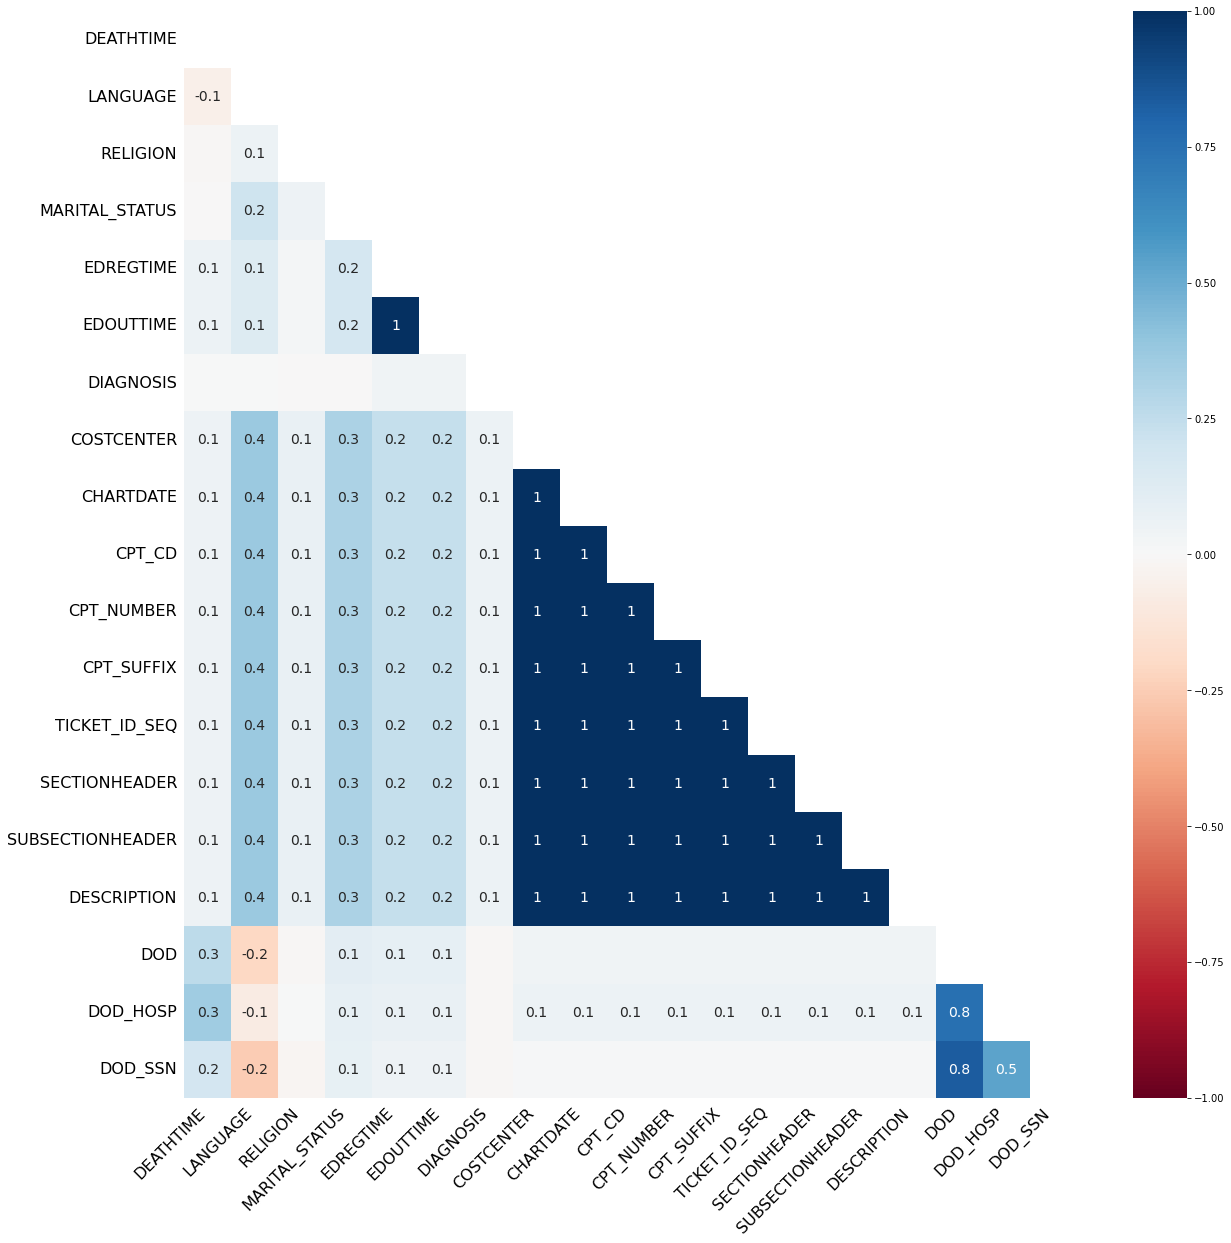

In [26]:
 msno.heatmap(aux[missingValueColumns],figsize=(20,20))

# Heatmap 

<Axes: >

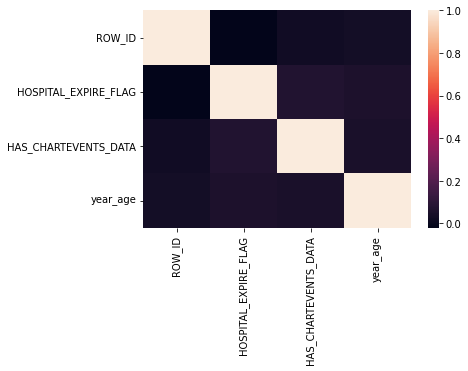

In [27]:
# `heatmap` plots a rectangular data in a color-encoded matrix and
# `corr` finds the pairwise correlation of all columns in the dataframe
sns.heatmap(aux.corr())

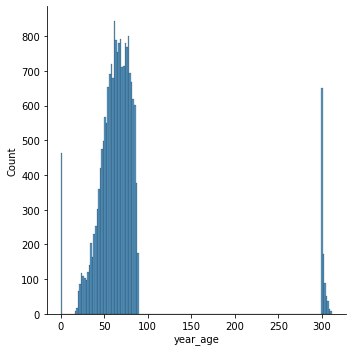

In [29]:
sns.displot(aux['year_age'])

##### contar valores de cada fila que se considera para el analisis

In [30]:
import pandas as pd
name =  "DRUG"
txt =df[["HADM_ID","SUBJECT_ID",name]].to_pandas()
txt.fillna(value = "NO DRUG",
          inplace = True)
# Supongamos que ya tienes un DataFrame 'df' con las columnas 'subject_id', 'ham_id' y 'lista_codigos'

# Lista para almacenar los datos del nuevo DataFrame
nuevos_datos = []

# Recorremos el DataFrame original 'df'
for index, row in txt.iterrows():
    subject_id = row['SUBJECT_ID']
    ham_id = row['HADM_ID']
    lista_codigos = row[name]
    lista_codigos=[elemento for elemento in lista_codigos if elemento is not None]

    # Creamos un diccionario con los datos para una fila del nuevo DataFrame
    for codigo in lista_codigos:
        nuevo_registro = {
            'SUBJECT_ID': subject_id,
            'HADM_ID': ham_id,
            name: codigo
        }

        # Agregamos el registro a la lista de nuevos datos
        nuevos_datos.append(nuevo_registro)

# Creamos un nuevo DataFrame con los datos recopilados
nuevo_df2 = pd.DataFrame(nuevos_datos)

# Muestra el nuevo DataFrame resultante
print(nuevo_df2)

        SUBJECT_ID HADM_ID                     DRUG
0               23  152223                  Syringe
1               23  152223        Phenylephrine HCl
2               23  152223            Nitroglycerin
3               23  152223                       LR
4               23  152223                  Syringe
...            ...     ...                      ...
1651407      98813  190264     0.9% Sodium Chloride
1651408      98813  190264     0.9% Sodium Chloride
1651409      98813  190264                Lorazepam
1651410      98813  190264        Zolpidem Tartrate
1651411      98813  190264  Influenza Virus Vaccine

[1651412 rows x 3 columns]


In [31]:
nuevo_df2 = nuevo_df2.drop_duplicates(subset=nuevo_df2.columns)
nuevo_df2.shape

(686556, 3)

In [32]:
import pandas as pd
name =  "NDC"
txt =df[["HADM_ID","SUBJECT_ID",name]].to_pandas()
txt.fillna(value = "NO DRUG",
          inplace = True)
# Supongamos que ya tienes un DataFrame 'df' con las columnas 'subject_id', 'ham_id' y 'lista_codigos'

# Lista para almacenar los datos del nuevo DataFrame
nuevos_datos = []

# Recorremos el DataFrame original 'df'
for index, row in txt.iterrows():
    subject_id = row['SUBJECT_ID']
    ham_id = row['HADM_ID']
    lista_codigos = row[name]
    lista_codigos=[elemento for elemento in lista_codigos if elemento is not None]

    # Creamos un diccionario con los datos para una fila del nuevo DataFrame
    for codigo in lista_codigos:
        nuevo_registro = {
            'SUBJECT_ID': subject_id,
            'HADM_ID': ham_id,
            name: codigo
        }

        # Agregamos el registro a la lista de nuevos datos
        nuevos_datos.append(nuevo_registro)

# Creamos un nuevo DataFrame con los datos recopilados
nuevo_df3 = pd.DataFrame(nuevos_datos)

# Muestra el nuevo DataFrame resultante
print(nuevo_df3)

        SUBJECT_ID HADM_ID          NDC
0               23  152223            0
1               23  152223  00074180001
2               23  152223  00074148402
3               23  152223  00338011704
4               23  152223            0
...            ...     ...          ...
1649666      98813  190264  00338004904
1649667      98813  190264  00338004904
1649668      98813  190264  00409198530
1649669      98813  190264  60505260400
1649670      98813  190264  33332001001

[1649671 rows x 3 columns]


In [33]:
nuevo_df3[nuevo_df3["SUBJECT_ID"]=="23"]

,SUBJECT_ID,HADM_ID,NDC
0,23,152223,0
1,23,152223,00074180001
2,23,152223,00074148402
3,23,152223,00338011704
4,23,152223,0
...,...,...,...
133,23,124321,0
134,23,124321,00182844789
135,23,124321,00172376010
136,23,124321,51079025520


In [34]:
nuevo_df2[nuevo_df2["SUBJECT_ID"]=="23"]

,SUBJECT_ID,HADM_ID,DRUG
0,23,152223,Syringe
1,23,152223,Phenylephrine HCl
2,23,152223,Nitroglycerin
3,23,152223,LR
5,23,152223,Sucralfate
...,...,...,...
132,23,124321,Quetiapine Fumarate
134,23,124321,Acetaminophen
135,23,124321,Lisinopril
136,23,124321,Metoprolol Tartrate


In [35]:
nuevo_df3 = nuevo_df3.drop_duplicates(subset=nuevo_df3.columns)
nuevo_df3.shape

(774114, 3)

In [36]:
nuevo_df3[name].nunique()

3790

In [39]:


count_df = nuevo_df2.groupby(['SUBJECT_ID', 'HADM_ID']).agg(
     DRUG_NAME_GENERIC=(name, 'count'),
    DRUG_NAME_GENERIC_unique=(name, 'nunique')
).reset_index()
count_df

KeyError: "Column(s) ['NDC'] do not exist"

##### separación de filas 

In [40]:
name = "DRUG"

In [41]:
import pandas as pd
txt =df[["HADM_ID","SUBJECT_ID",name]].to_pandas()
txt.fillna(value = "NO DRUG",
          inplace = True)
# Supongamos que ya tienes un DataFrame 'df' con las columnas 'subject_id', 'ham_id' y 'lista_codigos'

# Lista para almacenar los datos del nuevo DataFrame
nuevos_datos = []

# Recorremos el DataFrame original 'df'
for index, row in txt.iterrows():
    subject_id = row['SUBJECT_ID']
    ham_id = row['HADM_ID']
    lista_codigos = row[name]
    lista_codigos=[elemento for elemento in lista_codigos if elemento is not None]

    # Creamos un diccionario con los datos para una fila del nuevo DataFrame
    for codigo in lista_codigos:
        nuevo_registro = {
            'SUBJECT_ID': subject_id,
            'HADM_ID': ham_id,
            name: codigo
        }

        # Agregamos el registro a la lista de nuevos datos
        nuevos_datos.append(nuevo_registro)

# Creamos un nuevo DataFrame con los datos recopilados
nuevo_df = pd.DataFrame(nuevos_datos)

# Muestra el nuevo DataFrame resultante
print(nuevo_df)

        SUBJECT_ID HADM_ID                     DRUG
0               23  152223                  Syringe
1               23  152223        Phenylephrine HCl
2               23  152223            Nitroglycerin
3               23  152223                       LR
4               23  152223                  Syringe
...            ...     ...                      ...
1651407      98813  190264     0.9% Sodium Chloride
1651408      98813  190264     0.9% Sodium Chloride
1651409      98813  190264                Lorazepam
1651410      98813  190264        Zolpidem Tartrate
1651411      98813  190264  Influenza Virus Vaccine

[1651412 rows x 3 columns]


In [42]:
nuevo_df = nuevo_df.drop_duplicates(subset=nuevo_df.columns)
nuevo_df.shape

(686556, 3)

In [43]:
nuevo_df["DRUG"].nunique()

3209

In [44]:
nuevo_df = nuevo_df.dropna()
nuevo_df

,SUBJECT_ID,HADM_ID,DRUG
0,23,152223,Syringe
1,23,152223,Phenylephrine HCl
2,23,152223,Nitroglycerin
3,23,152223,LR
5,23,152223,Sucralfate
...,...,...,...
1651406,98813,190264,Chlordiazepoxide HCl
1651407,98813,190264,0.9% Sodium Chloride
1651409,98813,190264,Lorazepam
1651410,98813,190264,Zolpidem Tartrate


In [45]:
agregacion_df = nuevo_df.groupby(['SUBJECT_ID', 'HADM_ID']).agg(
    quantity_drugs=(name, 'count'),  # Contar cuántos códigos hay en cada grupo
    unique_drugs=(name, 'nunique')   # Contar cuántos códigos únicos hay en cada grupo
).reset_index()
agregacion_df

,SUBJECT_ID,HADM_ID,quantity_drugs,unique_drugs
0,10004,161106,23,23
1,10004,164713,61,61
2,1004,127794,38,38
3,1004,177186,25,25
4,10059,122098,40,40
...,...,...,...,...
19988,9998,108282,7,7
19989,9998,144947,21,21
19990,99982,112748,26,26
19991,99982,151454,46,46


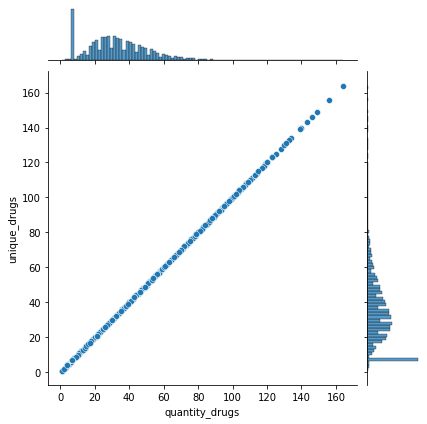

In [46]:
# TODO 2b
# `joinplot()` draws a plot of two variables with bivariate and univariate graphs.
sns.jointplot(x='quantity_drugs',y='unique_drugs',data=agregacion_df)

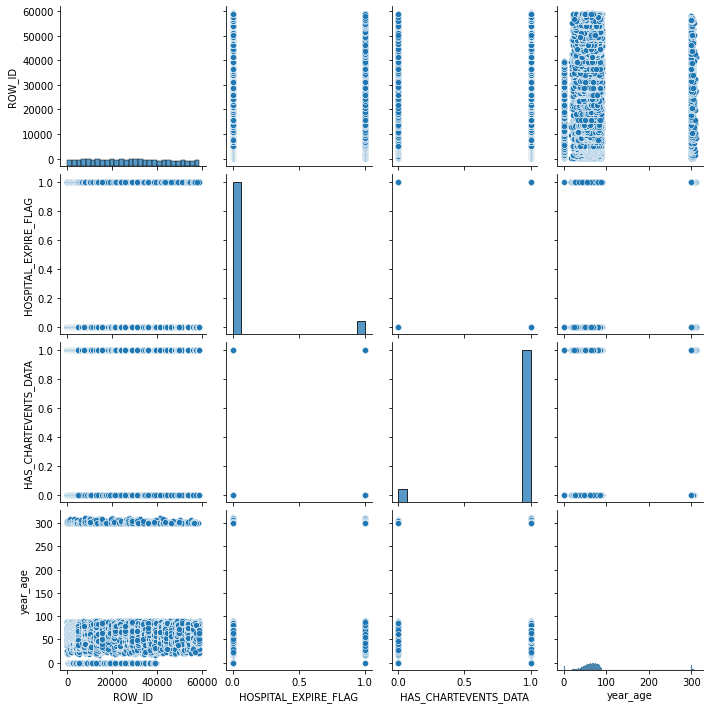

In [47]:
sns.pairplot(aux)

In [107]:
agregacion_df["res"] = agregacion_df["quantity_drugs"]-agregacion_df["unique_drugs"]

In [108]:
agregacion_df["res"].value_counts()

0    19993
Name: res, dtype: int64

#### Codigo por subject id

In [109]:
agregacion_df_sub = nuevo_df.groupby(['SUBJECT_ID', ]).agg(
    cantidad_codigos=(name, 'count'),  # Contar cuántos códigos hay en cada grupo
    codigos_unicos=(name, 'nunique')   # Contar cuántos códigos únicos hay en cada grupo
).reset_index()
agregacion_df_sub

,SUBJECT_ID,cantidad_codigos,codigos_unicos
0,10004,84,70
1,1004,63,53
2,10059,59,51
3,1006,200,106
4,10071,65,50
...,...,...,...
7532,99883,99,76
7533,99897,35,24
7534,99923,75,66
7535,9998,28,28


In [110]:
agregacion_df_sub["codigos_repetidos"] = agregacion_df_sub["cantidad_codigos"]-agregacion_df_sub["codigos_unicos"]

In [111]:
fig = px.histogram(agregacion_df_sub, x="codigos_repetidos",
                   marginal="box", # or violin, rug
                  )
fig.show()

## Drugs per subject

In [112]:
enfermedades_frecuentes = nuevo_df.groupby(['SUBJECT_ID', name]).size().reset_index(name='Frecuencia')

# Ordenar los datos por 'SUBJECT_ID' y la frecuencia de manera descendente
enfermedades_frecuentes = enfermedades_frecuentes.sort_values(by=['SUBJECT_ID', 'Frecuencia'], ascending=[True, False])

# Obtener las enfermedades más frecuentes para cada 'SUBJECT_ID'
max_frecuencia_por_subject = enfermedades_frecuentes.groupby('SUBJECT_ID')['Frecuencia'].max().reset_index()

max_frecuencia_por_subject

,SUBJECT_ID,Frecuencia
0,10004,2
1,1004,2
2,10059,2
3,1006,4
4,10071,2
...,...,...
7532,99883,2
7533,99897,2
7534,99923,2
7535,9998,1


In [113]:
top_most_freq = enfermedades_frecuentes.sort_values(by ="Frecuencia", ascending=False )
top_most_freq[:100]

,SUBJECT_ID,DRUG,Frecuencia
32283,13033,Insulin,42
32299,13033,Lorazepam,41
32305,13033,Metoclopramide,40
32236,13033,D5W,36
20489,11861,Insulin,34
...,...,...,...
13624,11318,Citalopram Hydrobromide,17
96872,19213,Heparin,17
374921,73713,Baclofen,17
112274,20643,Aspirin,17


In [114]:

fig = px.histogram(top_most_freq[:100], x=name, y="Frecuencia", color=name,
                   marginal="box",title ="Frecuencia de todos las enfermedades agrupados por subject id" # or violin, rugt 
                   )
fig.show()

## Maximo por frecuencia

In [115]:
max_frecuencia_por_subject = enfermedades_frecuentes.groupby('SUBJECT_ID')['Frecuencia'].max().reset_index()
max_frecuencia_por_subject.sort_values(by ="Frecuencia")[-100:]

,SUBJECT_ID,Frecuencia
7239,94977,8
5427,6440,8
1672,19827,8
3852,32453,8
4741,52622,8
...,...,...
6287,7809,22
143,109,31
4607,5060,31
334,11861,34


In [116]:
#### Top drug count per "Subject"

In [117]:
conteo_sid_por_icd9_code = nuevo_df.groupby(name)['SUBJECT_ID'].nunique().reset_index()
conteo_sid_por_icd9_code.columns = [name, 'Subject_count']

# Ordenar el DataFrame por 'sid_count' de manera descendente
conteo_sid_por_icd9_code_ordenado = conteo_sid_por_icd9_code.sort_values(by='Subject_count', ascending=False)

# Tomar los 50 primeros registros utilizando head()
conteo_sid_top_50 = conteo_sid_por_icd9_code_ordenado.head(50)

In [118]:
conteo_sid_por_icd9_code_ordenado

,DRUG,Subject_count
132,Acetaminophen,6486
2484,Sodium Chloride 0.9% Flush,6367
2229,Potassium Chloride,6361
1240,Heparin,6124
1638,Magnesium Sulfate,6053
...,...,...
2362,Razadyne ER,1
942,ERYTHROMYCIN,1
943,ESTRADIOL/NORETHINDR( Activella),1
944,Ear Drops Earwax Aid,1


In [119]:


# Crear el gráfico de barras utilizando Plotly Express
fig = px.bar(conteo_sid_por_icd9_code_ordenado[:50], x=name, y='Subject_count', color='Subject_count', title='Top frequent drugs by subject id')

# Mostrar el gráfico
fig.show()


### Cumulstive function

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample ICD-9 codes (replace this with your actual data)


def cumulative_plot(icd9_codes, num_bins,threshold_value,cat,col):
    # Create a DataFrame with ICD-9 codes and their frequencies
    icd9_df = pd.DataFrame(icd9_codes, columns=[col])
    icd9_df['Frequency'] = icd9_df[col].map(icd9_df[col].value_counts())
    icd9_df= icd9_df.sort_values(by='Frequency', ascending=False)

    # Drop duplicate rows to get unique ICD-9 codes and their frequencies
    unique_icd9_df = icd9_df.drop_duplicates().sort_values(by='Frequency', ascending=False)

    # Calculate cumulative frequency percentage
    unique_icd9_df['Cumulative Frequency'] = unique_icd9_df['Frequency'].cumsum()
    total_frequency = unique_icd9_df['Cumulative Frequency'].iloc[-1]
    unique_icd9_df['Cumulative F percentage'] = unique_icd9_df['Cumulative Frequency'] / total_frequency

    # Create the plot using Matplotlib
    fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

    # Histogram with fewer bins
      # Adjust the number of bins
    n, bins, patches = ax1.hist(icd9_df[col], bins=num_bins, color='blue', alpha=0.7)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequency', color='blue')

    # Add a vertical dashed line at the threshold value

    threshold_x_value = unique_icd9_df[unique_icd9_df["Cumulative F percentage"] >= threshold_value].sort_values(by="Cumulative F percentage", ascending=False).iloc[-1][col]
    
    bins_before_threshold = unique_icd9_df[unique_icd9_df["Cumulative F percentage"] < threshold_value].sort_values(by="Cumulative F percentage", ascending=False)[col].nunique()

        
    ax1.axvline(x=threshold_x_value, color='red', linestyle='--', linewidth=2, label='Threshold: ' + str(threshold_value) )
    ax1.annotate(f'{bins_before_threshold} Bins Before Threshold', xy=(threshold_x_value, 0), xytext=(10, 20), textcoords='offset points', fontsize=10, color='red')

        
    
    #percentage = count / total_frequency * 100
    #ax1.annotate(f'\n{i}', xy=(bins[i] + (bins[i+1] - bins[i])/2, count), ha='center', va='bottom', fontsize=10)
        #ax1.annotate(f'{int(count)}', xy=(bins[i] + (bins[i+1] - bins[i])/2, count), ha='center', va='bottom', fontsize=10, )

    # Customize the plot
    ax1.set_title('Histogram of:' +str(cat))
    ax1.legend(loc='upper right')



    # Create a secondary y-axis for cumulative frequency
    ax2 = ax1.twinx()
    ax2.plot(unique_icd9_df[col], unique_icd9_df['Cumulative F percentage'], color='green', label='Cumulative Frequency')
    ax2.set_ylabel('Cumulative Frequency', color='green')
    ax2.legend(loc='upper right')

    legend_position = (1, .2)  # Adjust the position as needed
    ax1.legend(loc='upper right', bbox_to_anchor=legend_position)
    ax2.legend(loc='lower right', bbox_to_anchor=legend_position)

    # Hide x-axis tick labels
    ax1.set_xticks([])

    # Show the plot
    plt.tight_layout()  # Adjust layout for labels
    plt.show()
    return bins_before_threshold

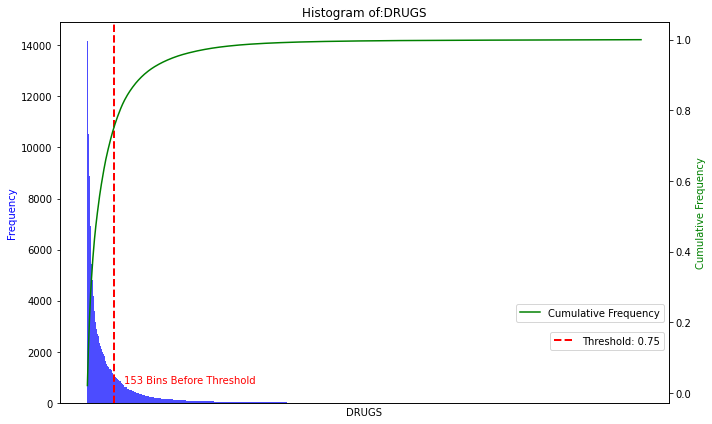

153

In [121]:
icd9_codes = list(nuevo_df[name])
cumulative_plot(icd9_codes, len(set(icd9_codes)),.75,"DRUGS","DRUGS")

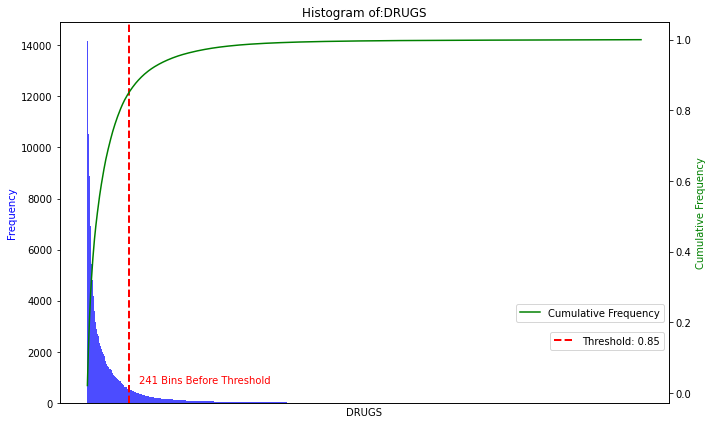

241

In [122]:
cumulative_plot(icd9_codes, len(set(icd9_codes)),.85,"DRUGS","DRUGS")

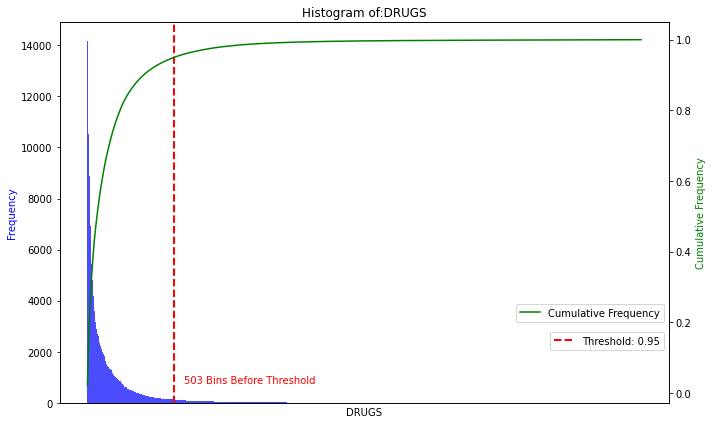

503

In [123]:
cumulative_plot(icd9_codes, len(set(icd9_codes)),.95,"DRUGS","DRUGS")

In [33]:
len(set(icd9_codes))

3790

# Top ICD 9 codes based "hadm_id" count

In [34]:
conteo_hadm_por_icd9_code = nuevo_df.groupby(name)['HADM_ID'].nunique().reset_index()
conteo_hadm_por_icd9_code.columns = [name, 'hadm_count']

# Ordenar el DataFrame por 'hadm_count' de manera descendente
conteo_hadm_por_icd9_code_ordenado = conteo_hadm_por_icd9_code.sort_values(by='hadm_count', ascending=False)

conteo_hadm_por_icd9_code_ordenado

,NDC,hadm_count
1,0,17707
227,00008084199,8547
1656,00338004904,8335
1655,00338004903,8217
1640,00338001702,7677
...,...,...
2268,00884044904,1
2303,00904401408,1
2309,00904506260,1
2341,00904588861,1


In [35]:
fig = px.bar(conteo_hadm_por_icd9_code_ordenado[:50], x=name, y='hadm_count', color='hadm_count', title='Top frequent drugs by subject count')

# Mostrar el gráfico
fig.show()


# Same procedure for generic name